In [1]:
!pip install opencv-python

In [2]:
!pip install matplotlib

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
# Эта команда нужна, чтобы изображения отображались прямо в Jupyter Notebook
%matplotlib inline

In [7]:
# Загрузка изображения
image = cv2.imread('Dog.jpg')

In [8]:
image.shape

(360, 640, 3)

In [9]:
# OpenCV загружает изображения в формате BGR, поэтому мы конвертируем его в RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

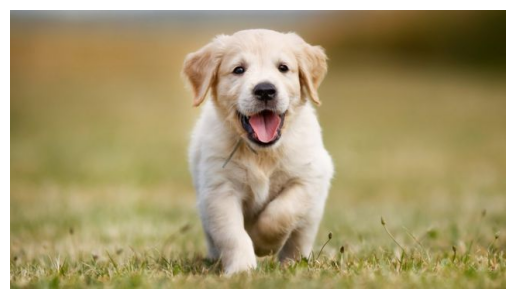

In [10]:
# Отображение изображения
plt.imshow(image_rgb)
plt.axis('off')  # скрыть оси координат
plt.show()

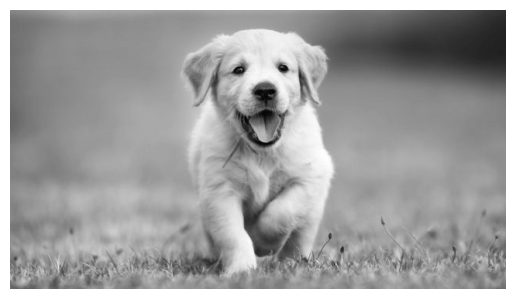

In [11]:
# Конвертация изображения в градации серого
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.show()

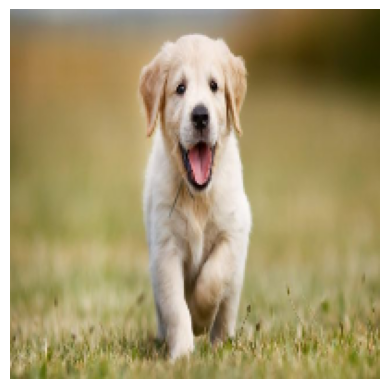

In [12]:
# Изменение размера до 200x200 пикселей
resized_image = cv2.resize(image_rgb, (200, 200))

plt.imshow(resized_image)
plt.axis('off')
plt.show()


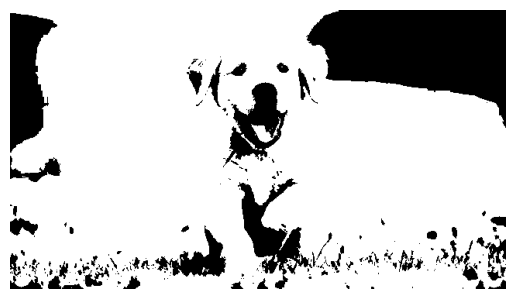

In [13]:
# Применение пороговой обработки
_, thresholded = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

plt.imshow(thresholded, cmap='gray')
plt.axis('off')
plt.show()

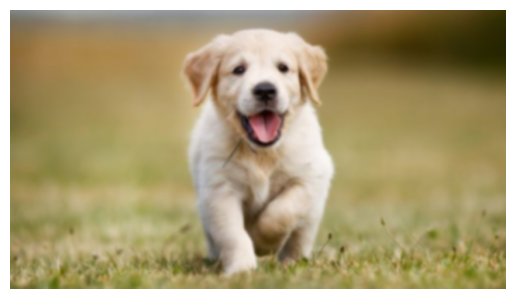

In [14]:
# Применение размытия
blurred = cv2.GaussianBlur(image_rgb, (7, 7), 0)

plt.imshow(blurred)
plt.axis('off')
plt.show()

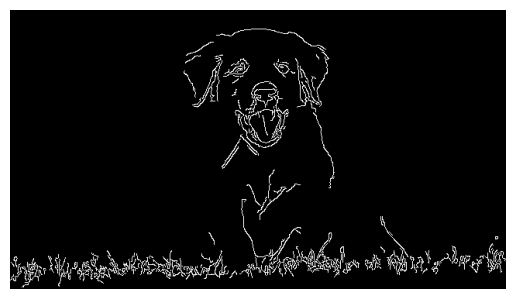

In [15]:
# Использование детектора границ Canny
edges = cv2.Canny(gray_image, 100, 200)

plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()

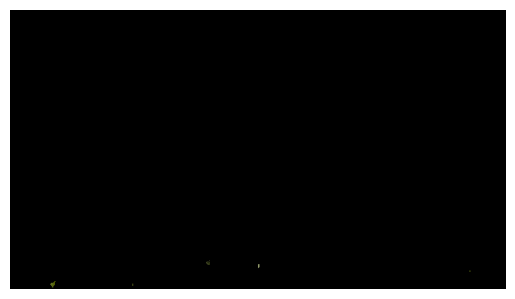

In [16]:
# Конвертация изображения из RGB в HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Определение диапазона зеленого цвета в HSV
lower_green = np.array([35, 50, 50])
upper_green = np.array([85, 255, 255])

# Создание маски
mask = cv2.inRange(hsv, lower_green, upper_green)

# Применение маски к исходному изображению
res = cv2.bitwise_and(image_rgb, image_rgb, mask=mask)

plt.imshow(res)
plt.axis('off')
plt.show()

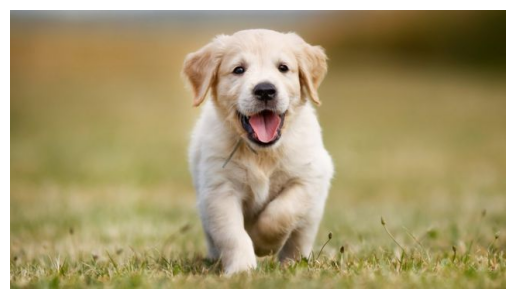

In [17]:
image = cv2.imread('Dog.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.axis('off')
plt.show()

In [18]:
# Параметры
k = 15  # число кластеров (можно изменить по желанию)

# Подготовка данных для K-means
pixel_values = image_rgb.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Критерии завершения (тип, макс. число итераций, требуемая точность)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# Применение K-means
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Преобразование центров кластеров в целые числа
centers = np.uint8(centers)

# Сопоставление меток пикселей с их цветами в центрах кластеров
segmented_image = centers[labels.flatten()]

# Возвращение изображения к исходной форме
segmented_image = segmented_image.reshape(image_rgb.shape)

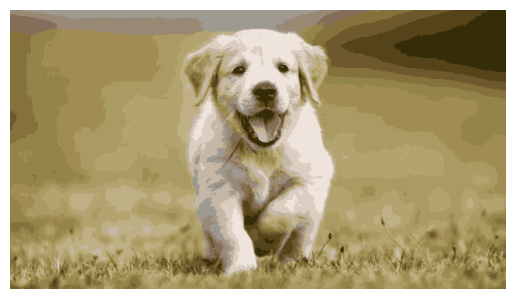

In [19]:
plt.imshow(segmented_image)
plt.axis('off')
plt.show()

In [20]:
# Загрузка и отображение исходного изображения
image = cv2.imread('Dog.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

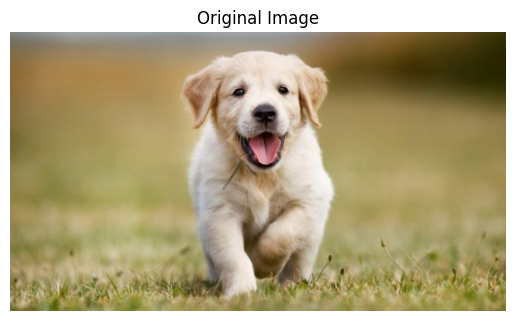

In [21]:
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')
plt.show()

In [22]:
# Вращение изображения
def rotate_image(image, angle):
    # Получение размеров изображения
    height, width = image.shape[:2]

    # Определение центра вращения
    center = (width / 2, height / 2)

    # Получение матрицы вращения
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1)

    # Применение матрицы вращения
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))

    return rotated_image

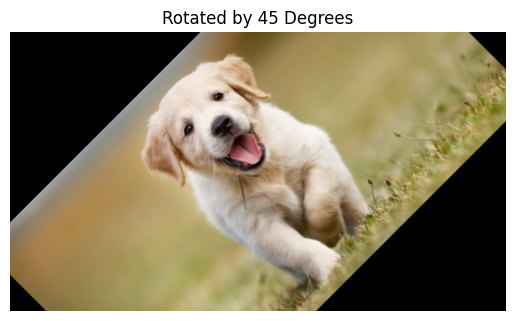

In [23]:
# Применение функции вращения
angle = 45  # угол вращения в градусах
rotated_img = rotate_image(image_rgb, angle)

plt.imshow(rotated_img)
plt.title(f"Rotated by {angle} Degrees")
plt.axis('off')
plt.show()

In [25]:
# Инициализация веб-камеры. 
# Аргумент '0' обычно указывает на встроенную веб-камеру. 
# Если у вас есть внешняя камера, вы можете использовать '1' или другой номер.
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Ошибка: не удалось открыть камеру.")
else:
    while True:
        # Чтение кадра
        ret, frame = cap.read()

        if not ret:
            print("Ошибка при чтении видео.")
            break

        # Отображение кадра
        cv2.imshow('Video Stream', frame)

        # Если была нажата клавиша 'q', то выход из цикла
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Освобождение ресурсов и закрытие окон
    cap.release()
    cv2.destroyAllWindows()


Запустите этот код, и вы должны увидеть видео с вашей веб-камеры в новом окне. Для завершения трансляции и закрытия окна нажмите клавишу q.

In [26]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Ошибка: не удалось открыть камеру.")
else:
    while True:
        ret, frame = cap.read()

        if not ret:
            print("Ошибка при чтении видео.")
            break

        # Уменьшаем изображение в 2 раза
        frame = cv2.resize(frame, (int(frame.shape[1]/2), int(frame.shape[0]/2)))

        # Цветовой фильтр (здесь будем выделять зеленый цвет, как в предыдущем примере)
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        lower_green = np.array([35, 50, 50])
        upper_green = np.array([85, 255, 255])
        mask = cv2.inRange(hsv, lower_green, upper_green)
        color_filtered = cv2.bitwise_and(frame, frame, mask=mask)

        # Фильтр границ (используем Canny детектор границ)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        edges = cv2.Canny(gray, 50, 150)
        edges_colored = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)  # делаем изображение трехканальным для объединения

        # Объединение изображений
        output = np.hstack((color_filtered, edges_colored, frame))

        cv2.imshow('Video Stream', output)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()


In [27]:
# Загрузка изображения
image = cv2.imread('House.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Нахождение углов с помощью метода Харриса
dst = cv2.cornerHarris(src=gray, blockSize=2, ksize=3, k=0.04)

# Расширение результата для визуализации
dst = cv2.dilate(dst, None)

# Наложение отметок на изображении там, где обнаружены углы
threshold = 0.01 * dst.max()
image[dst > threshold] = [0, 0, 255]

# Отображение результата с помощью matplotlib
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Отключаем оси координат
plt.show()


[ WARN:0@129.503] global loadsave.cpp:248 findDecoder imread_('House.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [37]:
# Загрузка изображения
image = cv2.imread('House.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Инициализация FAST детектора углов
fast = cv2.FastFeatureDetector_create()

# Нахождение и отображение углов
keypoints = fast.detect(gray, None)
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, color=(0, 255, 0))

# Отображение результата с помощью matplotlib
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Отключаем оси координат
plt.show()


[ WARN:0@4005.611] global loadsave.cpp:248 findDecoder imread_('House.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


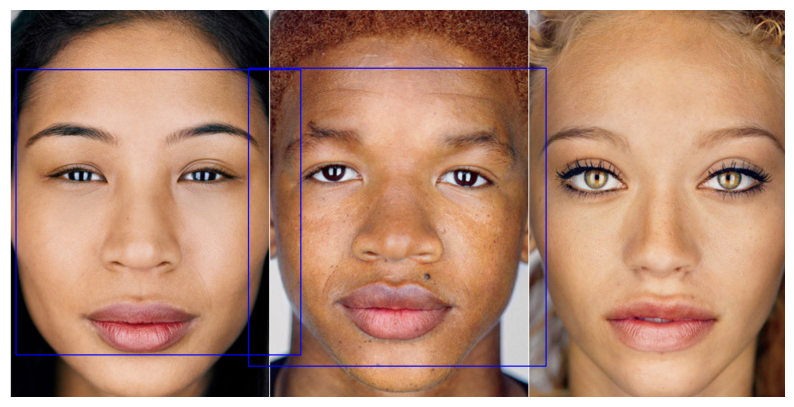

In [28]:
# Загрузка изображения
image = cv2.imread('Face.jpg')

angle = 0# угол вращения в градусах
image = rotate_image(image, angle)


gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


# Загрузка предварительно обученного каскада Хаара для детектирования лиц
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Детектирование лиц на изображении
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Рисуем прямоугольники вокруг обнаруженных лиц
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Отображение результата с помощью matplotlib
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Отключаем оси координат
plt.show()


In [26]:
# Инициализация видеопотока с веб-камеры (обычно веб-камера имеет индекс 0)
cap = cv2.VideoCapture(0)

# Проверка, инициализирован ли видеопоток корректно
if not cap.isOpened():
    print("Ошибка: не удалось открыть камеру!")
    exit()

# Загрузка предварительно обученного каскада Хаара для детектирования лиц
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

while True:
    # Захват кадра из видеопотока
    ret, frame = cap.read()
    if not ret:
        break

    # Конвертация кадра в оттенки серого
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Детектирование лиц на кадре
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    
    # Рисуем прямоугольники вокруг обнаруженных лиц
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

    # Отображение обработанного кадра
    cv2.imshow('Face Detection', frame)

    # Для выхода из цикла нажмите клавишу 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Освобождение ресурсов и закрытие окон
cap.release()
cv2.destroyAllWindows()


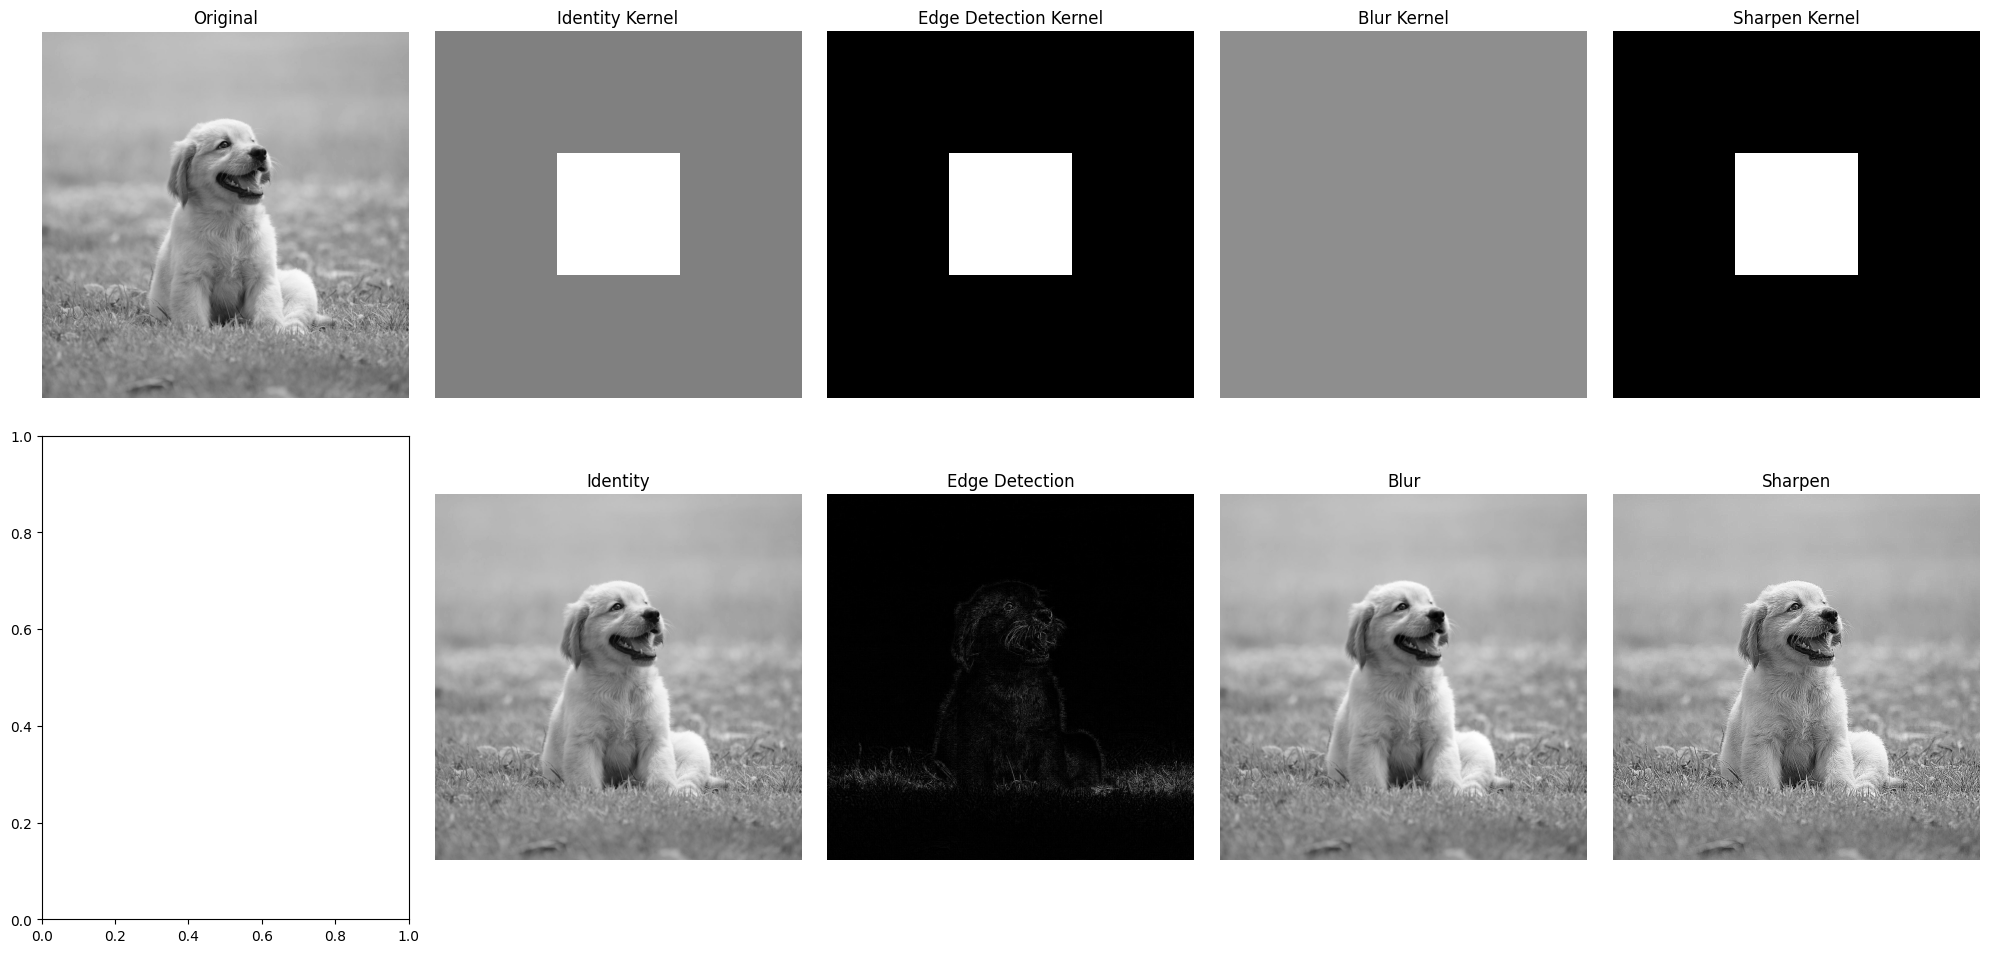

In [28]:
# Загрузка изображения
image_path = "Dog.jpg" # Замените на путь к вашему изображению
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Различные ядра
identity_kernel = np.array([
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, 0]
])

edge_detection_kernel = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
])

blur_kernel = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
]) / 9

sharpen_kernel = np.array([
    [-1, -1, -1],
    [-1, 9, -1],
    [-1, -1, -1]
])

kernels = [identity_kernel, edge_detection_kernel, blur_kernel, sharpen_kernel]
kernel_names = ["Identity", "Edge Detection", "Blur", "Sharpen"]

# Отображение изображений
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))

# Оригинальное изображение
axs[0, 0].imshow(image, cmap="gray")
axs[0, 0].set_title("Original")
axs[0, 0].axis('off')

# Применение ядер и отображение
for idx, kernel in enumerate(kernels):
    processed_image = cv2.filter2D(image, -1, kernel)
    axs[1, idx+1].imshow(processed_image, cmap="gray")
    axs[1, idx+1].set_title(kernel_names[idx])
    axs[1, idx+1].axis('off')

    # Отображение ядра
    axs[0, idx + 1].imshow(kernel, cmap="gray", vmin=-1, vmax=1)
    axs[0, idx + 1].set_title(kernel_names[idx] + " Kernel")
    axs[0, idx + 1].axis('off')

plt.tight_layout()
plt.show()


In [29]:
# Импорт необходимых библиотек
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Загрузка и предобработка данных
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Создание модели
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Добавление полносвязных слоев
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Компиляция и обучение модели
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

# Оценка производительности на тестовом наборе
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.4f}")


11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/5
938/938 [==============================] - 14s 15ms/step - loss: 0.1787 - accuracy: 0.9467
Epoch 2/5
938/938 [==============================] - 14s 15ms/step - loss: 0.0505 - accuracy: 0.9844
Epoch 3/5
938/938 [==============================] - 14s 15ms/step - loss: 0.0363 - accuracy: 0.9887
Epoch 4/5
938/938 [==============================] - 15s 16ms/step - loss: 0.0276 - accuracy: 0.9911
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0315 - accuracy: 0.9907
Test accuracy: 0.9907


In [30]:
# Импорт необходимых библиотек
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

# Определение модели
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

# Загрузка и предобработка данных
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = datasets.MNIST('./data', train=False, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Инициализация модели и оптимизатора
model = Net()
optimizer = optim.Adam(model.parameters())

# Обучение модели
model.train()
for epoch in range(5):
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        
        if batch_idx % 100 == 0:
            print(f"Train Epoch: {epoch} [{batch_idx*64}/{len(train_loader.dataset)}] Loss: {loss.item()}")

# Оценка производительности на тестовом наборе
model.eval()
test_loss = 0
correct = 0
with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
        pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
        correct += pred.eq(target.view_as(pred)).sum().item()

test_loss /= len(test_loader.dataset)

print(f"\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({100. * correct / len(test_loader.dataset):.0f}%)\n")


100%|██████████| 9912422/9912422 [00:00<00:00, 52167418.78it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|██████████| 28881/28881 [00:00<00:00, 14344072.68it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw



100%|██████████| 1648877/1648877 [00:00<00:00, 29416557.05it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|██████████| 4542/4542 [00:00<?, ?it/s]


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw

Train Epoch: 0 [0/60000] Loss: 2.3111019134521484
Train Epoch: 0 [6400/60000] Loss: 0.5764555931091309
Train Epoch: 0 [12800/60000] Loss: 0.1471126526594162
Train Epoch: 0 [19200/60000] Loss: 0.12908285856246948
Train Epoch: 0 [25600/60000] Loss: 0.06661263853311539
Train Epoch: 0 [32000/60000] Loss: 0.07039935141801834
Train Epoch: 0 [38400/60000] Loss: 0.038674864917993546
Train Epoch: 0 [44800/60000] Loss: 0.2878965735435486
Train Epoch: 0 [51200/60000] Loss: 0.05824104696512222
Train Epoch: 0 [57600/60000] Loss: 0.2624380886554718
Train Epoch: 1 [0/60000] Loss: 0.09569142013788223
Train Epoch: 1 [6400/60000] Loss: 0.2748132348060608
Train Epoch: 1 [12800/60000] Loss: 0.07498756051063538
Train Epoch: 1 [19200/60000] Loss: 0.11211605370044708
Train Epoch: 1 [25600/60000] Loss: 0.03455773741006851
Train Epoch: 1 [32000/60000] Loss: 0.05725037306547165
Train Epoch: 1 [38400/60000] Loss: 0.05846942588686943
Train